In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Load the dataset
df = pd.read_csv(os.path.join('/content/drive/MyDrive/Colab Notebooks/Car_Insurance_Claim.csv.zip'))

# Display the first few rows of the dataset
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [3]:
# Check column structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [4]:
# Statistically summarise each column
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [5]:
# List the columns you want to drop
columns_to_drop = ['CREDIT_SCORE', 'MARRIED', 'CHILDREN','POSTAL_CODE','ANNUAL_MILEAGE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS','EDUCATION', 'INCOME','GENDER', 'RACE','VEHICLE_YEAR']

df_old = df
# Drop the columns from the dataframe
df = df_old.drop(columns=columns_to_drop)

In [6]:
# Check for missing values in the entire dataset
missing_data = df.isnull().sum()

# Display columns with missing data
print(missing_data[missing_data > 0])

missing_columns = df.columns[df.isnull().any()]

Series([], dtype: int64)


In [7]:
# Map the age groups to numeric buckets
age_mapping = {
    '16-25': 1,
    '26-39': 2,
    '40-64': 3,
    '65+': 4
}

# Create a new column 'AGE_BUCKET' based on the age_mapping
df['AGE_BUCKET'] = df['AGE'].map(age_mapping)

# Map the driving experience groups to numeric buckets
experience_mapping = {
    '0-9y': 1,
    '10-19y': 2,
    '20-29y': 3,
    '30y+': 4
}

df = df.sort_values('AGE')

# Create a new column 'DRIVING_EXPERIENCE_BUCKET' based on the experience_mapping
df['DRIVING_EXPERIENCE_BUCKET'] = df['DRIVING_EXPERIENCE'].map(experience_mapping)


# Verify the new bucket columns
print(df[['AGE', 'AGE_BUCKET', 'DRIVING_EXPERIENCE', 'DRIVING_EXPERIENCE_BUCKET']].head())

        AGE  AGE_BUCKET DRIVING_EXPERIENCE  DRIVING_EXPERIENCE_BUCKET
3098  16-25           1               0-9y                          1
3045  16-25           1               0-9y                          1
3050  16-25           1               0-9y                          1
8141  16-25           1               0-9y                          1
3053  16-25           1               0-9y                          1


In [8]:
# Check for duplicate rows
df.duplicated().sum()

df.head()

,ID,AGE,DRIVING_EXPERIENCE,VEHICLE_OWNERSHIP,VEHICLE_TYPE,OUTCOME,AGE_BUCKET,DRIVING_EXPERIENCE_BUCKET
3098,247693,16-25,0-9y,1.0,sedan,1.0,1,1
3045,172866,16-25,0-9y,0.0,sedan,1.0,1,1
3050,833465,16-25,0-9y,1.0,sedan,1.0,1,1
8141,905593,16-25,0-9y,1.0,sedan,1.0,1,1
3053,113033,16-25,0-9y,1.0,sedan,1.0,1,1


<ipython-input-9-ce346f2a0e6a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AGE', data=df, palette='Set2', ax=axs[0, 0])
<ipython-input-9-ce346f2a0e6a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DRIVING_EXPERIENCE', data=df, palette='pastel', order=['0-9y', '10-19y', '20-29y', '30y+'], ax=axs[0, 1])
<ipython-input-9-ce346f2a0e6a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='VEHICLE_OWNERSHIP', data=df, palette='pastel', ax=axs[0, 2])
<ipython-input-9-ce346f2a0e6a>:25: FutureWarning: 

Passing `palette` without 

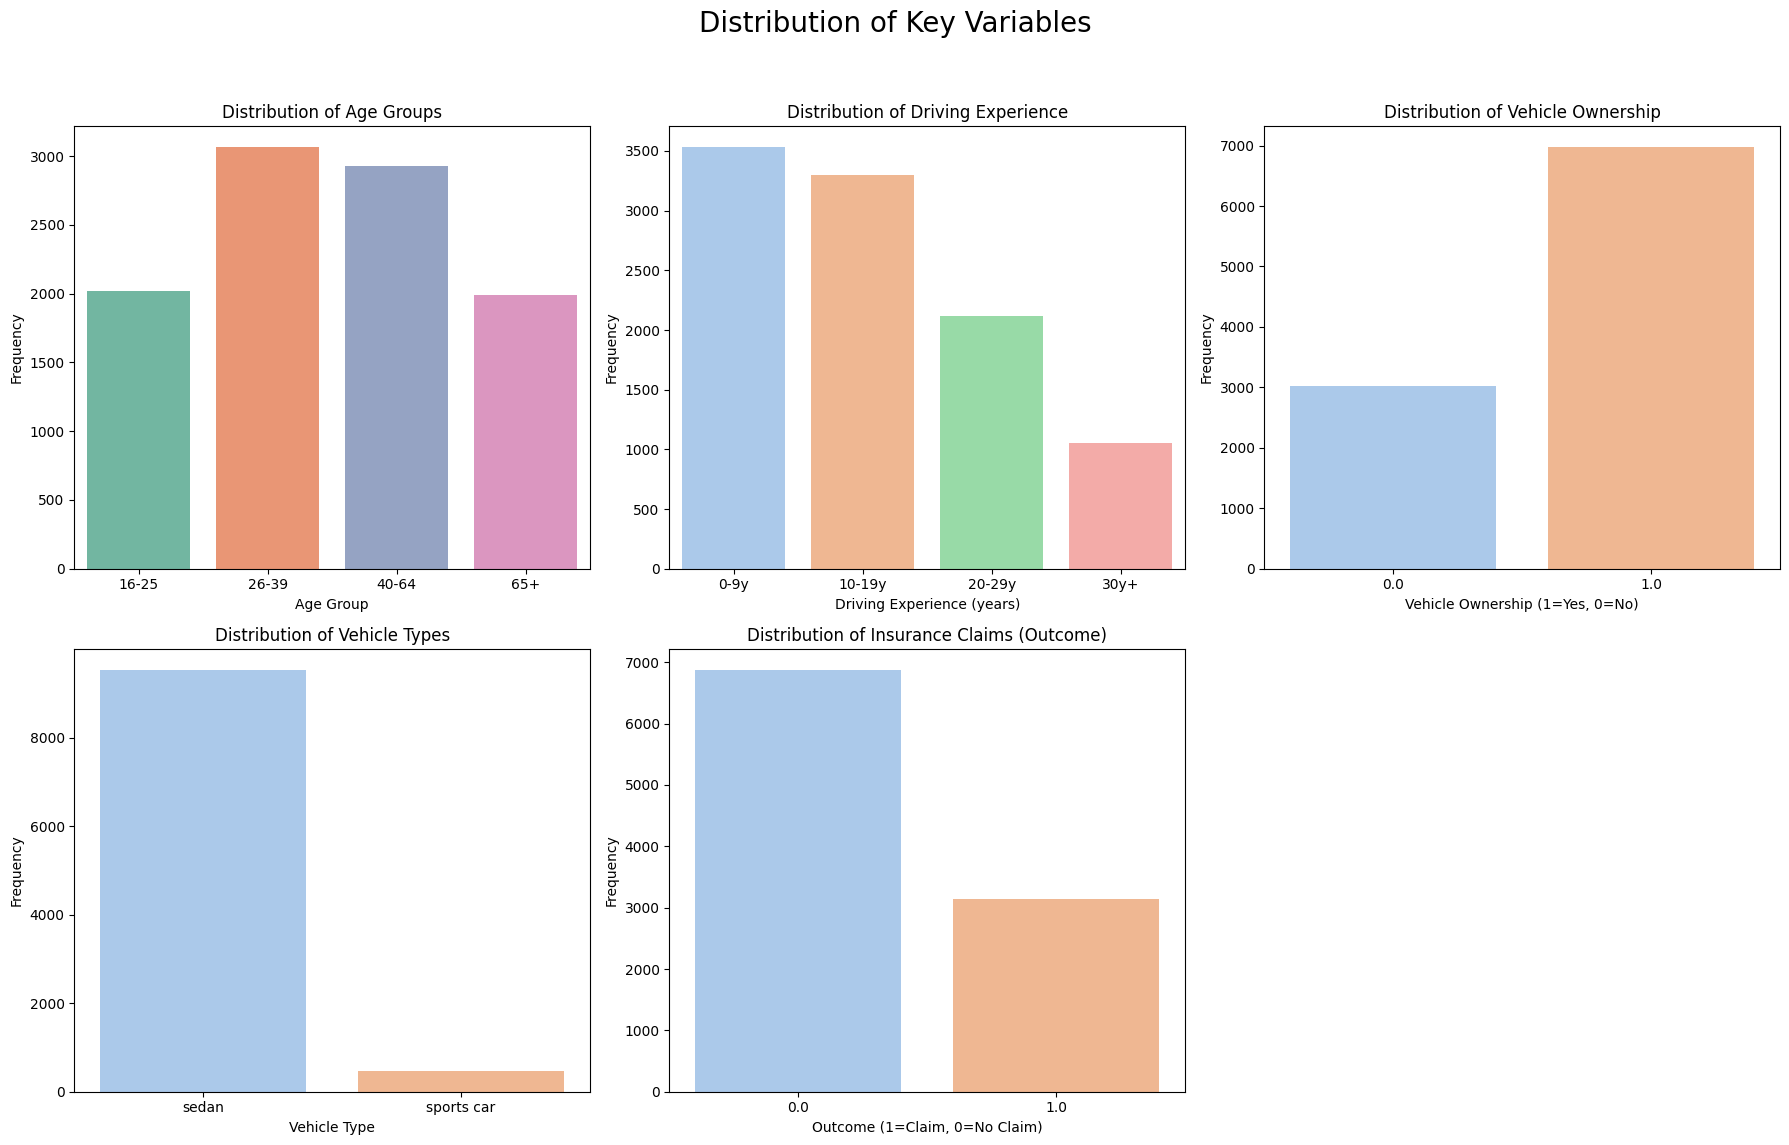

In [9]:
# Set up the figure, adjusting grid size to fit the reduced number of plots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

fig.suptitle('Distribution of Key Variables', fontsize=20)

# Age distribution
sns.countplot(x='AGE', data=df, palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Age Groups')
axs[0, 0].set_xlabel('Age Group')
axs[0, 0].set_ylabel('Frequency')

# Driving Experience distribution
sns.countplot(x='DRIVING_EXPERIENCE', data=df, palette='pastel', order=['0-9y', '10-19y', '20-29y', '30y+'], ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Driving Experience')
axs[0, 1].set_xlabel('Driving Experience (years)')
axs[0, 1].set_ylabel('Frequency')

# Vehicle Ownership distribution
sns.countplot(x='VEHICLE_OWNERSHIP', data=df, palette='pastel', ax=axs[0, 2])
axs[0, 2].set_title('Distribution of Vehicle Ownership')
axs[0, 2].set_xlabel('Vehicle Ownership (1=Yes, 0=No)')
axs[0, 2].set_ylabel('Frequency')

# Vehicle Type distribution
sns.countplot(x='VEHICLE_TYPE', data=df, palette='pastel', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Vehicle Types')
axs[1, 0].set_xlabel('Vehicle Type')
axs[1, 0].set_ylabel('Frequency')

# Outcome distribution
sns.countplot(x='OUTCOME', data=df, palette='pastel', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Insurance Claims (Outcome)')
axs[1, 1].set_xlabel('Outcome (1=Claim, 0=No Claim)')
axs[1, 1].set_ylabel('Frequency')

# Hide any unused subplot
axs[1, 2].axis('off')

# Adjust the layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

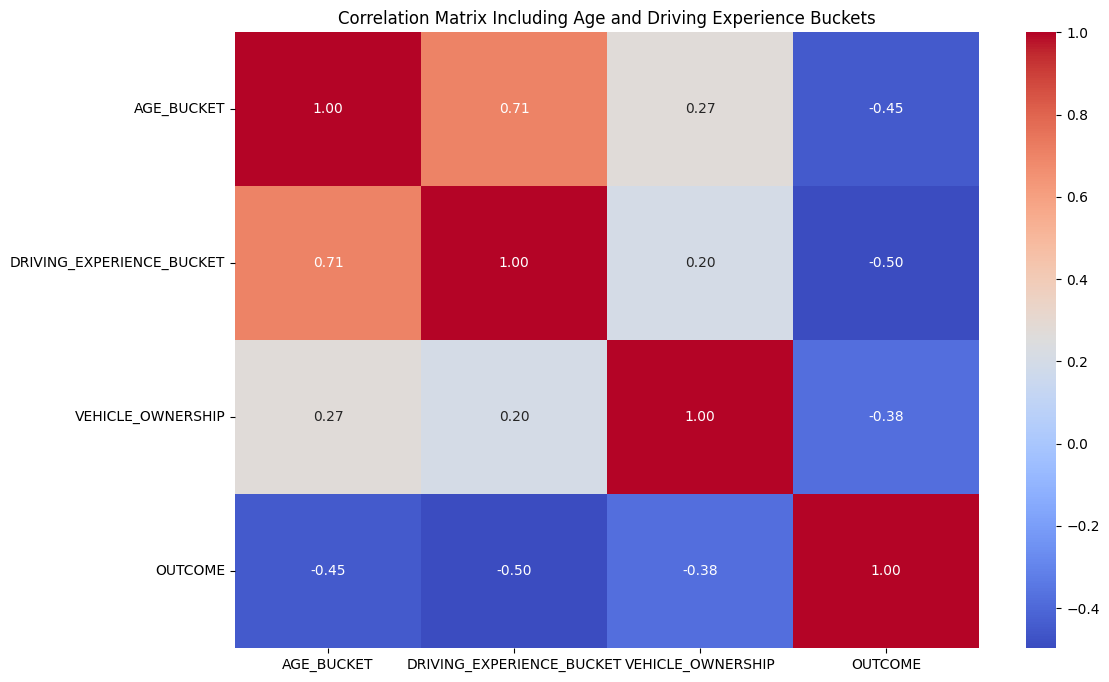

In [10]:
# Select numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Add the AGE_BUCKET and DRIVING_EXPERIENCE_BUCKET to the numeric dataframe
numeric_df = numeric_df[['AGE_BUCKET', 'DRIVING_EXPERIENCE_BUCKET','VEHICLE_OWNERSHIP','OUTCOME']]

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Including Age and Driving Experience Buckets')
plt.show()

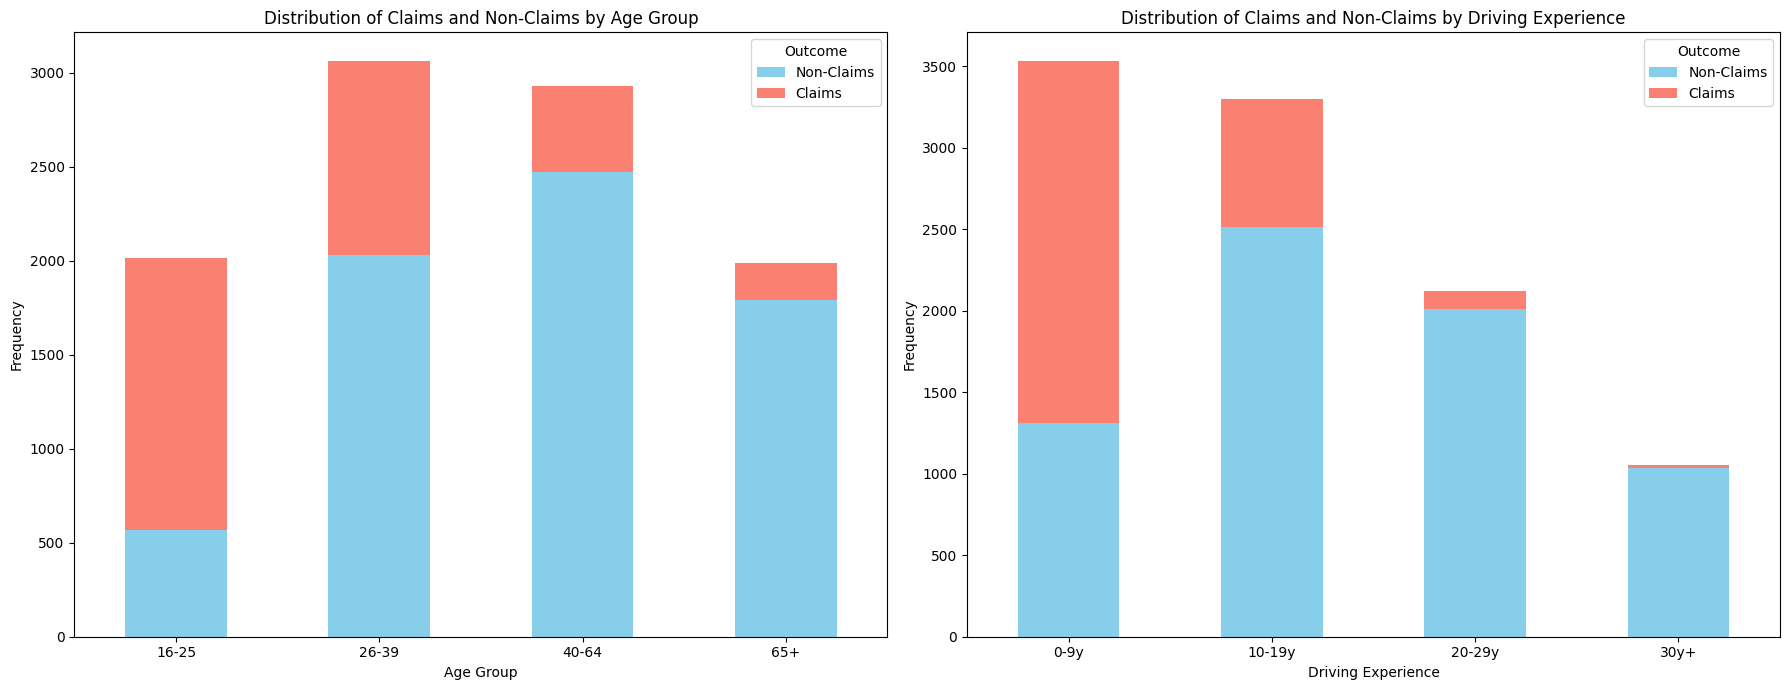

In [11]:
# Sort age buckets to be in order
df = df.sort_values('AGE')

age_group_claims = df.groupby(['AGE', 'OUTCOME']).size().unstack().fillna(0)

age_group_claims.columns = ['Non-Claims', 'Claims']


driving_experience_claims = df.groupby(['DRIVING_EXPERIENCE', 'OUTCOME']).size().unstack().fillna(0)

driving_experience_claims.columns = ['Non-Claims', 'Claims']

# Set up the figure for grid plotting
fig, axs = plt.subplots(1, 2, figsize=(18, 7))  # 1 row, 2 columns

# Plot 1: Age vs Claims
age_group_claims.plot(kind='bar', stacked=True, ax=axs[0], color=['skyblue', 'salmon'])
axs[0].set_title('Distribution of Claims and Non-Claims by Age Group')
axs[0].set_xlabel('Age Group')
axs[0].set_ylabel('Frequency')
axs[0].legend(title='Outcome')
axs[0].set_xticklabels(age_group_claims.index, rotation=0)

# Plot 2: Driving Experience vs Claims
driving_experience_claims.plot(kind='bar', stacked=True, ax=axs[1], color=['skyblue', 'salmon'])
axs[1].set_title('Distribution of Claims and Non-Claims by Driving Experience')
axs[1].set_xlabel('Driving Experience')
axs[1].set_ylabel('Frequency')
axs[1].legend(title='Outcome')
axs[1].set_xticklabels(driving_experience_claims.index, rotation=0)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

Optimization terminated successfully.
         Current function value: 0.455809
         Iterations 7


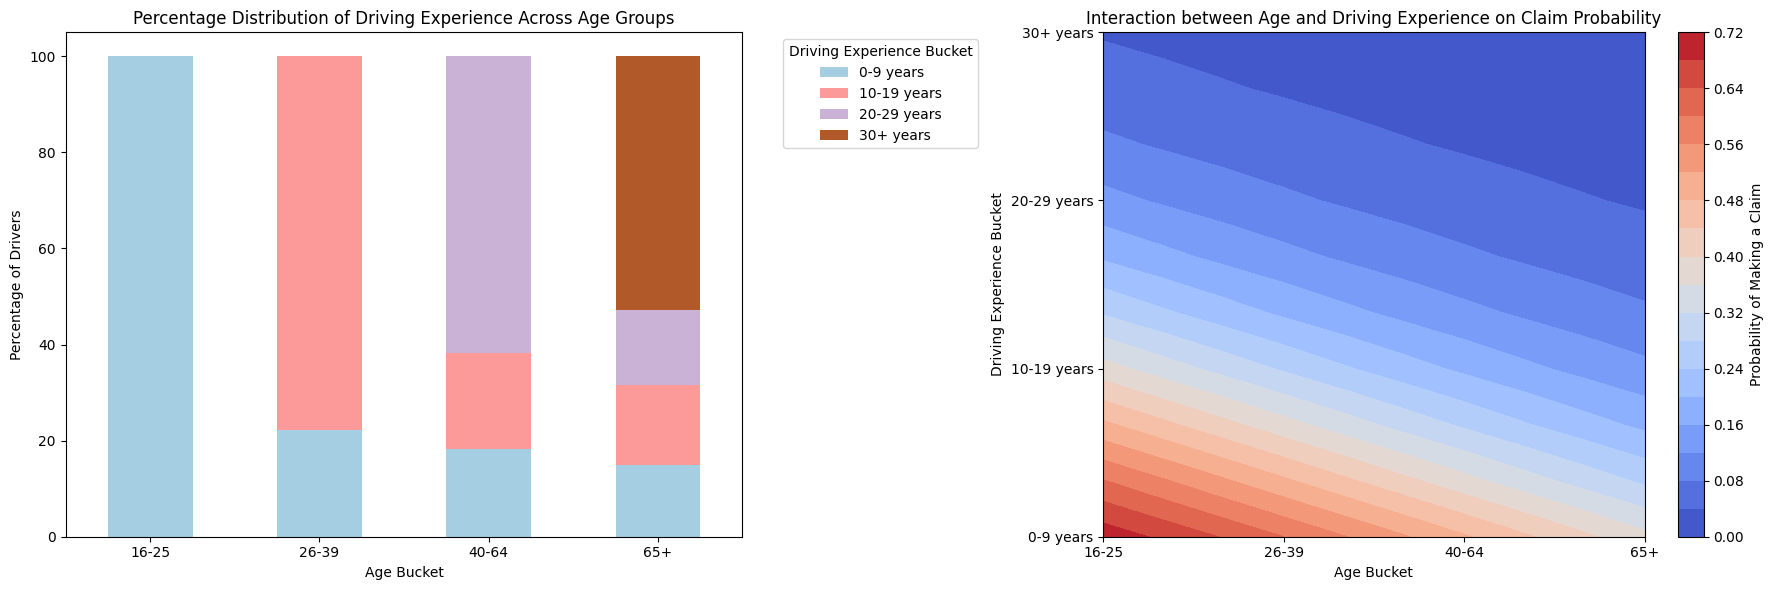

In [12]:
import statsmodels.api as sm

# Define figure and axis for side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# ---- Plot 1: Stacked Percentage Bar Chart ----
# Group by Age and Driving Experience, and count the occurrences
age_experience_counts = df.groupby(['AGE_BUCKET', 'DRIVING_EXPERIENCE_BUCKET']).size().unstack()

# Normalize to get percentages
age_experience_percentages = age_experience_counts.div(age_experience_counts.sum(axis=1), axis=0) * 100

# Display the table with percentages
age_experience_percentages.columns = ['0-9 years', '10-19 years', '20-29 years', '30+ years']
age_experience_percentages.index = ['16-25', '26-39', '40-64', '65+']

# Plot a stacked percentage bar chart
age_experience_percentages.plot(kind='bar', stacked=True, colormap="Paired", ax=ax1)

# Customize the chart
ax1.set_title('Percentage Distribution of Driving Experience Across Age Groups')
ax1.set_xlabel('Age Bucket')
ax1.set_ylabel('Percentage of Drivers')
ax1.set_xticklabels(['16-25', '26-39', '40-64', '65+'], rotation=0)

# Move the legend outside the plot
ax1.legend(title='Driving Experience Bucket', bbox_to_anchor=(1.05, 1), loc='upper left')

# ---- Plot 2: Heatmap of Claim Probability Based on Age and Driving Experience ----
# Original labels for age and experience buckets
age_labels = ['16-25', '26-39', '40-64', '65+']
experience_labels = ['0-9 years', '10-19 years', '20-29 years', '30+ years']

# Define the independent variables (including a constant)
X = df[['AGE_BUCKET', 'DRIVING_EXPERIENCE_BUCKET']]
X = sm.add_constant(X)  # Adds a constant term to the model

# Define the dependent variable
y = df['OUTCOME']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Generate a grid of AGE_BUCKET and DRIVING_EXPERIENCE_BUCKET values
age_values = np.linspace(df['AGE_BUCKET'].min(), df['AGE_BUCKET'].max(), 10)
experience_values = np.linspace(df['DRIVING_EXPERIENCE_BUCKET'].min(), df['DRIVING_EXPERIENCE_BUCKET'].max(), 10)
age_grid, experience_grid = np.meshgrid(age_values, experience_values)
grid = pd.DataFrame({
    'AGE_BUCKET': age_grid.ravel(),
    'DRIVING_EXPERIENCE_BUCKET': experience_grid.ravel()
})

# Predict the probability of a claim for each combination
grid = sm.add_constant(grid)
grid['CLAIM_PROBABILITY'] = result.predict(grid)

# Plot the interaction with updated labels
contour = ax2.contourf(age_values, experience_values, grid['CLAIM_PROBABILITY'].values.reshape(age_grid.shape), 20, cmap="coolwarm")
fig.colorbar(contour, ax=ax2, label="Probability of Making a Claim")
ax2.set_xlabel('Age Bucket')
ax2.set_ylabel('Driving Experience Bucket')

# Update axis ticks to show the labels
ax2.set_xticks([1, 2, 3, 4])
ax2.set_xticklabels(age_labels)
ax2.set_yticks([1, 2, 3, 4])
ax2.set_yticklabels(experience_labels)

ax2.set_title('Interaction between Age and Driving Experience on Claim Probability')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

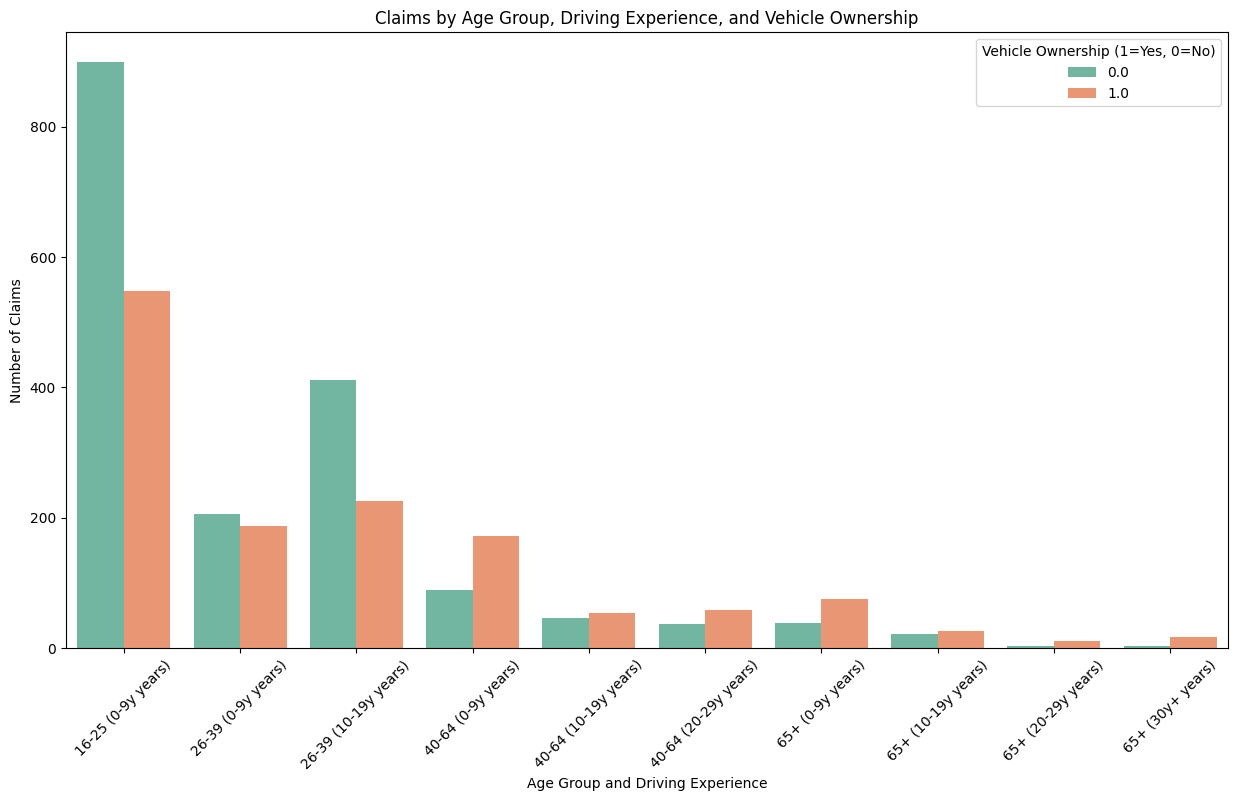

In [13]:
# Create a new column to represent the combination of Age Group and Driving Experience
df['Age_Driving_Experience'] = df['AGE'].astype(str) + ' (' + df['DRIVING_EXPERIENCE'].astype(str) + ' years)'

# Group by the new combination of Age Group and Driving Experience along with Vehicle Ownership
age_experience_ownership_claims = df.groupby(['Age_Driving_Experience', 'VEHICLE_OWNERSHIP'])['OUTCOME'].sum().reset_index()
age_experience_ownership_claims.columns = ['Age_Driving_Experience', 'Vehicle Ownership', 'Claims']

# Plot the chart
plt.figure(figsize=(15, 8))
sns.barplot(x='Age_Driving_Experience', y='Claims', hue='Vehicle Ownership', data=age_experience_ownership_claims, palette='Set2', errorbar=None)
plt.title('Claims by Age Group, Driving Experience, and Vehicle Ownership')
plt.xlabel('Age Group and Driving Experience')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title='Vehicle Ownership (1=Yes, 0=No)')
plt.show()

In [14]:
# Define age buckets labels
age_buckets = {
    1: '16-25',
    2: '26-39',
    3: '40-64',
    4: '65+'
}

# Calculate the claim rate for vehicle owners
claim_rate_owners = df[df['VEHICLE_OWNERSHIP'] == 1]['OUTCOME'].mean()

# Calculate the claim rate for non-owners
claim_rate_non_owners = df[df['VEHICLE_OWNERSHIP'] == 0]['OUTCOME'].mean()

# Calculate how much more likely non-owners are to make a claim compared to owners
likelihood_increase = (claim_rate_non_owners / claim_rate_owners if claim_rate_owners > 0 else float('inf'))*100

# Output the result
print("Age Group: All")
print(f"  Claim rate for owners: {claim_rate_owners:.2f}")
print(f"  Claim rate for non-owners: {claim_rate_non_owners:.2f}")
print(f"  Non-owners are {likelihood_increase:.2f}% more likely to make a claim compared to owners.\n")

# Iterate over each age bucket
for age_bucket, age_label in age_buckets.items():
    # Filter data for the current age bucket
    age_group = df[df['AGE_BUCKET'] == age_bucket]

    # Calculate claim rates for vehicle owners and non-owners
    claim_rate_owners = age_group[age_group['VEHICLE_OWNERSHIP'] == 1]['OUTCOME'].mean()
    claim_rate_non_owners = age_group[age_group['VEHICLE_OWNERSHIP'] == 0]['OUTCOME'].mean()

    # Calculate how much more likely non-owners are to make a claim compared to owners
    likelihood_increase = (claim_rate_non_owners / claim_rate_owners if claim_rate_owners > 0 else float('inf'))*100

    # Output the result
    print(f"Age Group: {age_label}")
    print(f"  Claim rate for owners: {claim_rate_owners:.2f}")
    print(f"  Claim rate for non-owners: {claim_rate_non_owners:.2f}")
    print(f"  Non-owners are {likelihood_increase:.2f}% more likely to make a claim compared to owners.\n")

Age Group: All
  Claim rate for owners: 0.20
  Claim rate for non-owners: 0.58
  Non-owners are 293.73% more likely to make a claim compared to owners.

Age Group: 16-25
  Claim rate for owners: 0.55
  Claim rate for non-owners: 0.89
  Non-owners are 162.29% more likely to make a claim compared to owners.

Age Group: 26-39
  Claim rate for owners: 0.21
  Claim rate for non-owners: 0.57
  Non-owners are 270.97% more likely to make a claim compared to owners.

Age Group: 40-64
  Claim rate for owners: 0.12
  Claim rate for non-owners: 0.27
  Non-owners are 217.62% more likely to make a claim compared to owners.

Age Group: 65+
  Claim rate for owners: 0.08
  Claim rate for non-owners: 0.23
  Non-owners are 301.25% more likely to make a claim compared to owners.



<ipython-input-15-238e8b7cff58>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VEHICLE_TYPE', y='OUTCOME', data=vehicle_type_claims, palette='Set2')


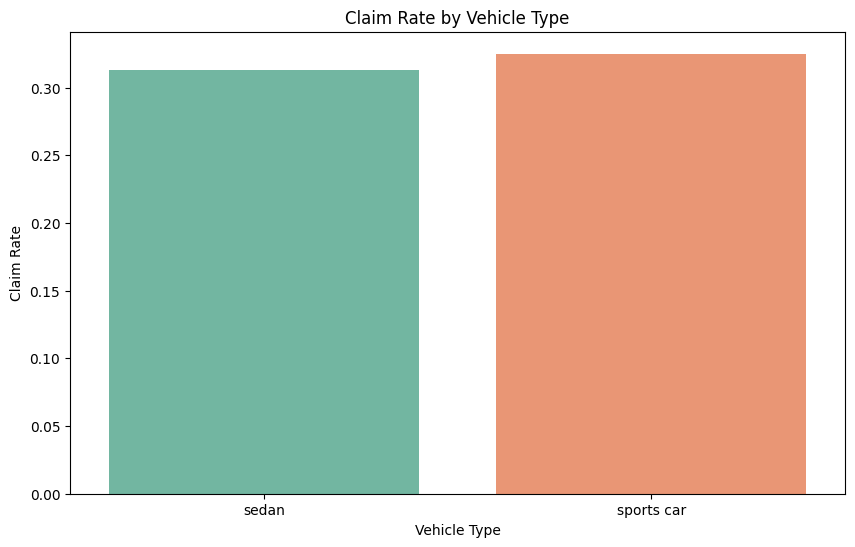

In [15]:
# Group data by Vehicle Type and calculate claim rates
vehicle_type_claims = df.groupby('VEHICLE_TYPE')['OUTCOME'].mean().reset_index()

# Plot the claim rate by Vehicle Type
plt.figure(figsize=(10, 6))
sns.barplot(x='VEHICLE_TYPE', y='OUTCOME', data=vehicle_type_claims, palette='Set2')
plt.title('Claim Rate by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Claim Rate')
plt.show()

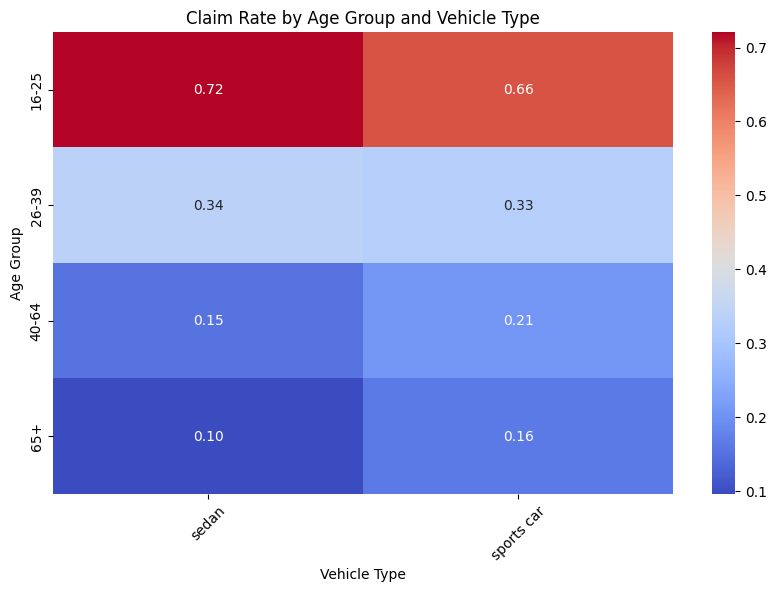

In [16]:
# Group by both Age Group and Vehicle Type to calculate claim rates
age_vehicle_claims = df.groupby(['AGE', 'VEHICLE_TYPE'])['OUTCOME'].mean().unstack()

# Plot a heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(age_vehicle_claims, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Claim Rate by Age Group and Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.show()

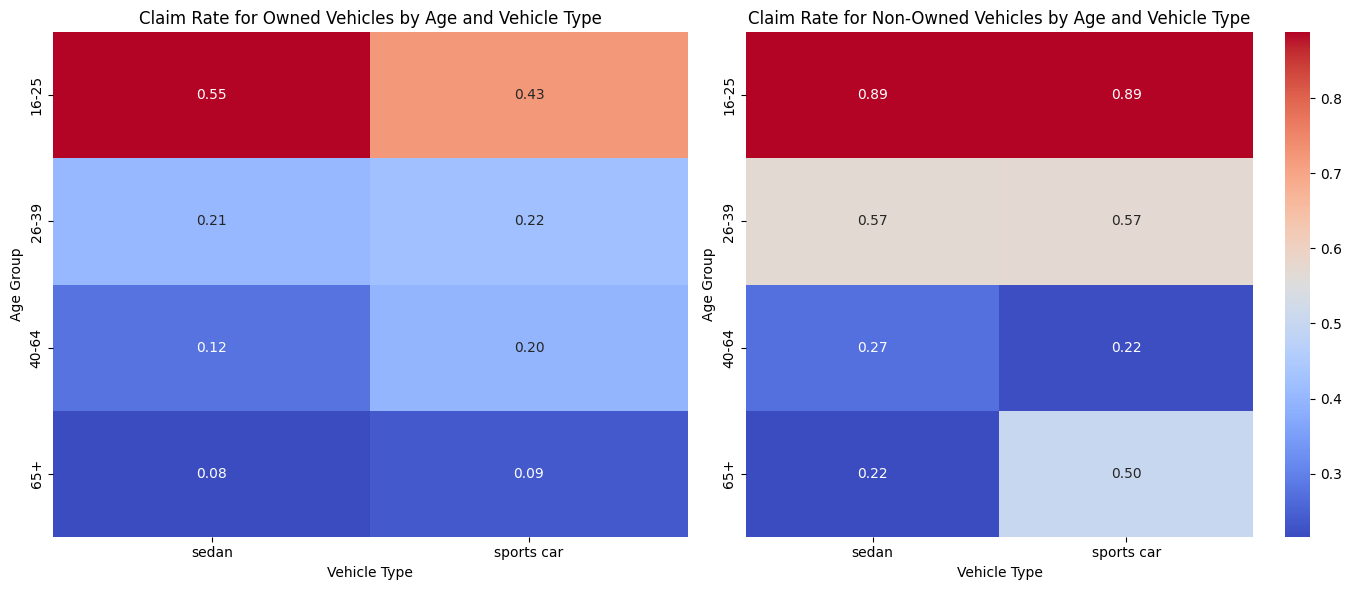

Claim rate for 16-25 year old sedan owners: 0.55
Claim rate for 16-25 year old sports car owners: 0.43
16-25 year old sedan owners are 127.03% more likely to make a claim compared to sports car owners.


In [17]:
# Group by Age Group, Vehicle Type, and Vehicle Ownership, and calculate the claim rate
claim_rate_age_vehicle_ownership = df.groupby(['AGE', 'VEHICLE_TYPE', 'VEHICLE_OWNERSHIP'])['OUTCOME'].mean().reset_index()

# Separate data for owned and not owned vehicles
owned_vehicles = claim_rate_age_vehicle_ownership[claim_rate_age_vehicle_ownership['VEHICLE_OWNERSHIP'] == 1.0]
non_owned_vehicles = claim_rate_age_vehicle_ownership[claim_rate_age_vehicle_ownership['VEHICLE_OWNERSHIP'] == 0.0]

# Pivot the data to create a 2D matrix for heatmap
owned_pivot = owned_vehicles.pivot(index='AGE', columns='VEHICLE_TYPE', values='OUTCOME')
non_owned_pivot = non_owned_vehicles.pivot(index='AGE', columns='VEHICLE_TYPE', values='OUTCOME')


# Plot the heatmaps for Owned and Not Owned vehicles
plt.figure(figsize=(14, 6))

# Heatmap for owned vehicles
plt.subplot(1, 2, 1)
sns.heatmap(owned_pivot, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Claim Rate for Owned Vehicles by Age and Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Age Group')

# Heatmap for not owned vehicles
plt.subplot(1, 2, 2)
sns.heatmap(non_owned_pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Claim Rate for Non-Owned Vehicles by Age and Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Age Group')

plt.tight_layout()
plt.show()

# Filter the dataset for the 16-25 age group
age_group_16_25 = df[df['AGE_BUCKET'] == 1]  # Assuming '1' corresponds to the 16-25 age group

# Further filter for vehicle owners only
owned_vehicles_16_25 = age_group_16_25[age_group_16_25['VEHICLE_OWNERSHIP'] == 1]

# Calculate the claim rate for sedan owners
claim_rate_sedan = owned_vehicles_16_25[owned_vehicles_16_25['VEHICLE_TYPE'] == 'sedan']['OUTCOME'].mean()

# Calculate the claim rate for sports car owners
claim_rate_sports_car = owned_vehicles_16_25[owned_vehicles_16_25['VEHICLE_TYPE'] == 'sports car']['OUTCOME'].mean()

# Calculate the likelihood increase (how much more likely sedan owners are to make a claim than sports car owners)
if claim_rate_sports_car > 0:
    likelihood_increase = (claim_rate_sedan / claim_rate_sports_car) * 100
else:
    likelihood_increase = float('inf')  # Handle division by zero if no sports car owners made claims

# Print the results
print(f"Claim rate for 16-25 year old sedan owners: {claim_rate_sedan:.2f}")
print(f"Claim rate for 16-25 year old sports car owners: {claim_rate_sports_car:.2f}")
print(f"16-25 year old sedan owners are {likelihood_increase:.2f}% more likely to make a claim compared to sports car owners.")